In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset.shape

(614, 13)

In [7]:

replace_dict = {
    "Gender": {'Male': 1, 'Female': 0},
    "Married": {'No': 0, 'Yes': 1},
    "Dependents": {'0': 0, '1': 1, '2': 2, '3+': 4},
    "Education": {'Graduate': 1, 'Not Graduate': 0},
    "Self_Employed": {'No': 0, 'Yes': 1},
    "Property_Area": {'Rural': 0, 'Urban': 1, 'Semiurban': 2},
    "Loan_Status": {'N': 0, 'Y': 1}
}

# Use the replace method with the dictionary and inplace=True
dataset.replace(replace_dict, inplace=True)

# Display the first few rows of the dataset
print(dataset.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002     1.0      0.0         0.0          1            0.0   
1  LP001003     1.0      1.0         1.0          1            0.0   
2  LP001005     1.0      1.0         0.0          1            1.0   
3  LP001006     1.0      1.0         0.0          0            0.0   
4  LP001008     1.0      0.0         0.0          1            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              1            1  
1             1.0              0            0  
2       

C:\Users\Sana\AppData\Local\Temp\ipykernel_2332\1571195458.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(replace_dict, inplace=True)


In [9]:
#Replace null values with mode
# Create a dictionary with column names as keys and their modes as values
modes = {
    "Gender": dataset["Gender"].mode()[0],
    "Married": dataset["Married"].mode()[0],
    "Dependents": dataset["Dependents"].mode()[0],
    "Self_Employed": dataset["Self_Employed"].mode()[0],
    "LoanAmount": dataset["LoanAmount"].mode()[0],
    "Loan_Amount_Term": dataset["Loan_Amount_Term"].mode()[0],
    "Credit_History": dataset["Credit_History"].mode()[0]
}

# Use the fillna method with the dictionary and inplace=True
dataset.fillna(value=modes, inplace=True)


In [10]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
dataset['Dependents'].value_counts()

Dependents
0.0    360
1.0    102
2.0    101
4.0     51
Name: count, dtype: int64

In [12]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,1,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [13]:
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataset['Loan_Status']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [30]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
143,1.0,1.0,0.0,1,0.0,2698,2034.0,122.0,360.0,1.0,2
218,1.0,1.0,2.0,1,0.0,5000,0.0,72.0,360.0,0.0,2
312,0.0,0.0,0.0,1,0.0,2507,0.0,56.0,360.0,1.0,0
546,1.0,0.0,0.0,0,0.0,3358,0.0,80.0,36.0,1.0,2
36,1.0,1.0,0.0,1,0.0,1828,1330.0,100.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
100,1.0,1.0,2.0,0,0.0,4288,3263.0,133.0,180.0,1.0,1
288,0.0,0.0,0.0,1,0.0,4124,0.0,115.0,360.0,1.0,2
122,0.0,0.0,0.0,1,0.0,2137,8980.0,137.0,360.0,0.0,2
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1


In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

In [17]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [18]:
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [19]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8079710144927537


In [20]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [34]:
X_new=classifier.predict([[1.0,0.0,1.0,1,0.0,3583,0.0,140.0,360.0,1.0,0]])
X_new

C:\Users\Sana\anaconda3\envs\notebook-7.0.6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7903225806451613


In [22]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,X_test_prediction)

In [23]:
cf

array([[ 9, 10],
       [ 3, 40]], dtype=int64)

In [25]:
classifier.classes_

array([0, 1], dtype=int64)

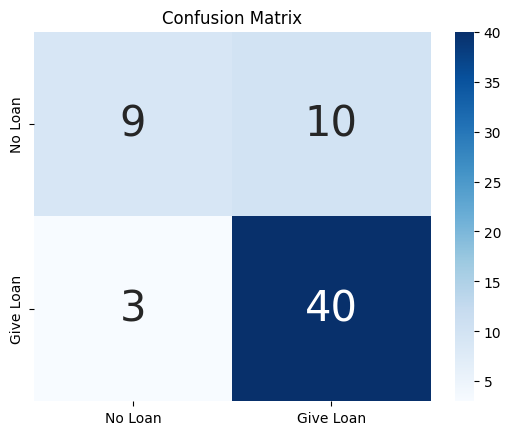

In [28]:
# Plot confusion matrix
import seaborn as sns
ax = plt.axes()
df_cm = cf

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", xticklabels=['No Loan','Give Loan'], yticklabels=['No Loan','Give Loan'],ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [35]:
import numpy as np

# Given confusion matrix
cf = np.array([[9, 10], [3, 40]])

# Extract components
tn, fp, fn, tp = cf.ravel()
print(tn)
# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


9
Accuracy: 0.79
Precision: 0.80
Recall: 0.93
F1 Score: 0.86
